# Problem 3: K‐means Clustering Implementation

Your task is to use Python (along  with  numpy  and  Pandas) to implement the well‐known clustering algorithm, **K‐means**, based on a synthetic dataset `cdata.csv`. 

This dataset contains two data columns, *“X”* and *“Y”*, and one *“cluster”* column (1, 2, 3, and 4). 

In implementing K‐means, you need to use *“X” and “Y”* as **features** for clustering while the “cluster” column is for your validation. 

Note that it is not necessary to perfectly clustering all of the data points into clusters. 

**Also note that the “cluster” column cannot be used in clustering.**

In [1]:
import pandas as pd # reading csv as input data
from typing import List # for better code reading experience
import matplotlib.pyplot as plt # data visualization
import itertools, random, math #

In [2]:
# we may use a python list with contains all float numbers to represent a Vector type object
Vector = List[float]

In [3]:
def vector_sum(vectors: List[Vector]) -> Vector:
    '''sum all vector into one vector'''
    num_elements = len(vectors[0])
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

print(vector_sum([[1, 2], [3, 4], [5, 6]]))

[9, 12]


In [4]:
def scalar_multiply(c: float, vector: Vector) -> Vector:
    '''multiply a value c to each element in our Vector'''
    return [c * ele for ele in vector]

print(scalar_multiply(3, [2, 3, 4]))

[6, 9, 12]


In [5]:
def vector_mean(vectors: List[Vector]) -> Vector:
    '''count mean by each element from '''
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

print(vector_mean([[1, 2], [3, 4], [5, 6]]))

[3.0, 4.0]


In [6]:
def dot(v: Vector, w: Vector) -> float:
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [7]:
def subtract(v:Vector, w:Vector) -> Vector:
    return [v_i - w_i for v_i, w_i in zip(v, w)]

In [8]:
def squared_distance(v: Vector, w: Vector) -> float:
    sum_of_squares = lambda v: dot(v, v)
    return sum_of_squares(subtract(v, w))

In [9]:
def distance(v: Vector, w:Vector) -> float:
    '''count distance between Vector v and Vector w'''
    return math.sqrt(squared_distance(v, w))

In [10]:
def num_differences(vector_1: Vector, vector_2: Vector) -> int:
    '''use this to track element in two Vectors if they are different from each other'''
    v1_v2 = zip(vector_1, vector_2)
    return len([x1 for x1, x2 in v1_v2 if x1 != x2])

print(num_differences([1, 2, 3], [2, 1, 3]))

2


In [11]:
def cluster_mean(k: int, inputs: List[Vector], assignments: List[int]) -> List[Vector]:
    clusters = [[] for _ in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]

In [12]:
class KMeans:
    '''K-Means object'''
    
    def __init__(self, k: int):
        self.k = k   # cluster number
        self.centroids = None
    
    def classify(self, input: Vector) -> int:
        '''assign back to the nearest cluster'''
        
        return min(range(self.k), key=lambda i: squared_distance(input, self.centroids[i]))
    
    def fit(self, inputs: List[Vector], visualize=False, set_seed=None):
        '''train our k-means model'''
        
        random.seed(set_seed)
        
        self.assignments = [random.randrange(self.k) for _ in inputs]
        self.features = [feature for feature in inputs]
        
        step = 1
        for _ in itertools.count():
            # keep looping until converged, and quit loop with return

            self.centroids = cluster_mean(self.k, inputs, self.assignments)
            self.new_assignments = [self.classify(input) for input in inputs]

            num_changed = num_differences(self.assignments, self.new_assignments)
            if num_changed == 0:
                return
            self.assignments = self.new_assignments
            self.centroids = cluster_mean(self.k, inputs, self.assignments)

            if visualize == True:
                # let user choose to show step or not to show step
                plt.title(f'step {step}')
                step += 1
                colors = ["orange","pink","blue","brown","red","grey","yellow","green"] * 10
                f_a = [(i, j) for i, j in zip(inputs, self.assignments)]
                type_0 = [point for point, color in f_a if color == 0]
                type_1 = [point for point, color in f_a if color == 1]
                type_2 = [point for point, color in f_a if color == 2]
                type_3 = [point for point, color in f_a if color == 3]
                type_4 = [point for point, color in f_a if color == 4]
                plt.scatter([j[0] for j in type_0], [j[1] for j in type_0], color=colors[0])
                plt.scatter([j[0] for j in type_1], [j[1] for j in type_1], color=colors[1])
                plt.scatter([j[0] for j in type_2], [j[1] for j in type_2], color=colors[2])
                plt.scatter([j[0] for j in type_3], [j[1] for j in type_3], color=colors[3])
                plt.scatter([j[0] for j in type_4], [j[1] for j in type_4], color=colors[4])
                plt.scatter([i[0] for i in model.centroids], [i[1] for i in model.centroids], marker='*', s=200, color='gold')
                plt.show()

In [13]:
df = pd.read_csv('cdata.csv')
labels = [i for i in df.cluster]
x1 = [i for i in df.x]
x2 = [i for i in df.y]
input_data = [[i, j] for i, j in zip(x1, x2)]

## (1) Randomly select data points as the initialized centroids. 
By default, please set K=4. Report and 
plot  the  process  until  convergence.  The  centroids  also  need  to  be  plotted.  An  example  is 
shown below. Note that it may not have 3 rounds (it can be 4 or 5 rounds, depend on initialized 
centroids).

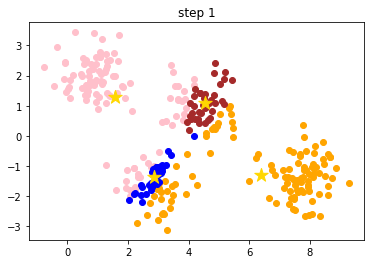

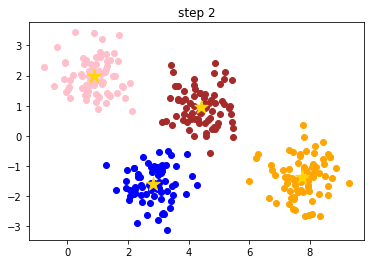

In [14]:
model = KMeans(4)
model.fit(input_data, visualize=True)

In [15]:
model.centroids

[[7.753689333333332, -1.3732426666666668],
 [0.8677146666666671, 1.9825840000000003],
 [2.830810666666667, -1.5843826666666665],
 [4.419069333333333, 0.9497333333333331]]

## (2) Re‐execute your K‐means clustering algorithm by changing K from 2 to 50 (from 2 to 10 is also okay). 

Plot the K value (x‐axis) vs. the value of Sum of Squared Error (SSE) (y‐axis) as below. 

Note that it is reasonable and acceptable if the curve is 凹凸不平.

In [16]:
def count_errors(inputs: List[Vector], k: int) -> float:
    ''''''
    model = KMeans(k)
    model.fit(inputs)
    centroids = model.centroids
    assignments = [model.classify(point) for point in inputs]
    
    return sum(squared_distance(point, centroids[cluster])
               for point, cluster in zip(inputs, assignments))

<function matplotlib.pyplot.show(close=None, block=None)>

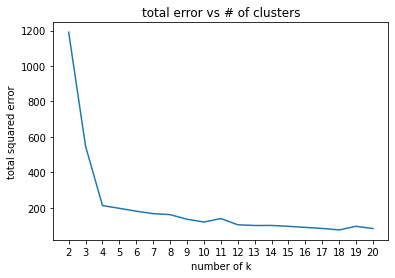

In [17]:
ks = range(2, 21)
errors = [count_errors(input_data, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel('number of k')
plt.ylabel('total squared error')
plt.title('total error vs # of clusters')
plt.show

## (3) Try 10 times of randomly initialized centroids, and plot their SSE values (y‐axis) such as below. 

<function matplotlib.pyplot.show(close=None, block=None)>

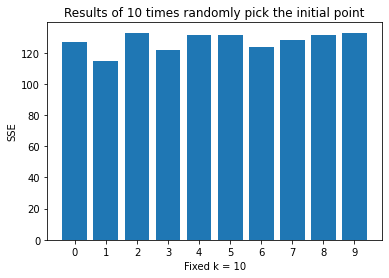

In [18]:
times = range(10)
k = 10
errors = [count_errors(input_data, k) for _ in times]

plt.bar(times, errors)
plt.xticks(times)
plt.xlabel('Fixed k = 10')
plt.ylabel('SSE')
plt.title('Results of 10 times randomly pick the initial point')
plt.show